### Análise Exploratória 
[Jobs and Salaries in Data Science](https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data)

#### Importando os dados

In [73]:
# Importando as bibliotecas necessárias
import pandas as pd
from matplotlib import pyplot as plt

In [74]:
# Carregando o dataset
data = pd.read_csv('jobs_in_data.csv')

In [75]:
print(f'{data.shape[0]} linhas e {data.shape[1]} colunas')

9355 linhas e 12 colunas


In [76]:
data.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

#### Limpeza e preparação dos dados

- Identificando valores ausentes NaN (Not a Number) ou dados duplicados.

In [77]:
data.isna().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [78]:
data.duplicated().sum()

4014

- Depois de remover os dados duplicados é necessário resetar o índice
- Fazendo com que realize a contagem correta dos valores únicos do DataFrame

In [79]:
data = data.drop_duplicates()

In [80]:
data = data.reset_index(drop=True)

- Removendo colunas que não vão ser utilizadas

In [81]:
data = data.drop(columns=['salary_currency', 'salary', 'employee_residence', 'company_location'])

- Convertendo o tipo de dado das colunas

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5341 entries, 0 to 5340
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         5341 non-null   int64 
 1   job_title         5341 non-null   object
 2   job_category      5341 non-null   object
 3   salary_in_usd     5341 non-null   int64 
 4   experience_level  5341 non-null   object
 5   employment_type   5341 non-null   object
 6   work_setting      5341 non-null   object
 7   company_size      5341 non-null   object
dtypes: int64(2), object(6)
memory usage: 333.9+ KB


In [83]:
# Dados categóricos economizam memória e facilitam nas análises
colunas = ['job_category', 'experience_level', 'employment_type', 'work_setting', 'company_size']
data[colunas] = data[colunas].astype('category')

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5341 entries, 0 to 5340
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   work_year         5341 non-null   int64   
 1   job_title         5341 non-null   object  
 2   job_category      5341 non-null   category
 3   salary_in_usd     5341 non-null   int64   
 4   experience_level  5341 non-null   category
 5   employment_type   5341 non-null   category
 6   work_setting      5341 non-null   category
 7   company_size      5341 non-null   category
dtypes: category(5), int64(2), object(1)
memory usage: 152.4+ KB


#### Agregação de dados e operações de grupo

In [85]:
data.head(3)

,work_year,job_title,job_category,salary_in_usd,experience_level,employment_type,work_setting,company_size
0,2023,Data DevOps Engineer,Data Engineering,95012,Mid-level,Full-time,Hybrid,L
1,2023,Data Architect,Data Architecture and Modeling,186000,Senior,Full-time,In-person,M
2,2023,Data Architect,Data Architecture and Modeling,81800,Senior,Full-time,In-person,M


- Resumindo os dados com `groupby` para visualizar a distribuição das vagas 

In [86]:
# Resumindo os dados pelo total de vagas por função e área de atuação
group = data.groupby(['work_year', 'job_category']).size().reset_index(name='quantidade')

# Selecionando somente valores existentes
group = group[group['quantidade'] > 0]

/tmp/ipykernel_3766/3422239475.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = data.groupby(['work_year', 'job_category']).size().reset_index(name='quantidade')


In [87]:
group.tail(3)

,work_year,job_category,quantidade
37,2023,Data Science and Research,1217
38,2023,Leadership and Management,271
39,2023,Machine Learning and AI,713


- Transformando o DataFrame em uma tabela dinâmica com `pivot_table`

In [88]:
# Preenchendo os valores ausentes da Tabela com fillna e transformando os valores em Int
tabela = group.pivot_table(index='job_category', columns='work_year').fillna(0).astype(int)

/tmp/ipykernel_3766/3361481725.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabela = group.pivot_table(index='job_category', columns='work_year').fillna(0).astype(int)


In [89]:
# Acrescentando Totais Gerais na tabela e ordenando os dados
tabela['Total'] = tabela.sum(axis=1)
tabela = tabela.sort_values(by='Total', ascending=False)
tabela.loc['Total por ano'] = tabela.sum(axis=0)

In [90]:
# Centralizando e formatando a tabela
tabela.style.set_properties(**{'text-align': 'center'})

In [91]:
data.tail(3)

,work_year,job_title,job_category,salary_in_usd,experience_level,employment_type,work_setting,company_size
5338,2021,Principal Data Scientist,Data Science and Research,151000,Mid-level,Full-time,Remote,L
5339,2020,Data Scientist,Data Science and Research,105000,Entry-level,Full-time,Remote,S
5340,2020,Business Data Analyst,Data Analysis,100000,Entry-level,Contract,Remote,L


- Quantidade de vagas e média salarial anual por categoria de trabalho em Data Science

In [92]:
# Agrupando os dados por categoria de trabalho e realizando cálculos com agg
media_categoria = data.groupby(['job_category']).agg({'job_category': 'count', 'salary_in_usd': 'mean'})

# Ordenando os dados pela médial salarial anual
media_categoria = media_categoria.sort_values(by='salary_in_usd', ascending=False)

/tmp/ipykernel_3766/2150741327.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_categoria = data.groupby(['job_category']).agg({'job_category': 'count', 'salary_in_usd': 'mean'})


##### Distribuição das vagas por categoria e uma médial salarial anual sendo:
- **Machine Learning and AI** lidera com os maiores salários e uma quantidade alta de vagas. 
- **Cloud and Database** tem um número baixo de vagas mas ainda assim com uma média salarial alta.
- **Data Science and Research** / **Data Engineering** com alto volume de vagas e uma média salarial alta.
- **Data Analysis** com alto número de vagas e uma média salarial baixa 

In [93]:
# Centralizando e formatando a tabela
media_categoria.style.set_properties(**{'text-align': 'center'})

,job_category,salary_in_usd
job_category,,
Machine Learning and AI,917,170453.221374
Data Science and Research,1655,157131.039879
Data Architecture and Modeling,162,157054.006173
Cloud and Database,5,155000.000000
Leadership and Management,351,149020.108262
Data Engineering,1160,142967.543103
BI and Visualization,188,128377.734043
Data Management and Strategy,49,107655.836735
Data Analysis,809,106707.058096


##### Distribuição da média salarial anual por categoria e nível de experiência

In [94]:
# Agrupando os dados por nível de experiência e categoria, calculando uma média salarial anual
media_experiencia = data.groupby(['experience_level', 'job_category'])['salary_in_usd'].mean().reset_index()

# Selecionando somente valores existentes
media_experiencia = media_experiencia[media_experiencia['salary_in_usd'] > 0]
media_experiencia.head(3)

/tmp/ipykernel_3766/2393813224.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_experiencia = data.groupby(['experience_level', 'job_category'])['salary_in_usd'].mean().reset_index()


,experience_level,job_category,salary_in_usd
0,Entry-level,BI and Visualization,85928.571429
2,Entry-level,Data Analysis,69169.810811
4,Entry-level,Data Engineering,87876.272727


In [95]:
# Transformando em uma Tabela Dinâmica e substituindo os valores vazios
media_experiencia = media_experiencia.pivot_table(index='job_category', columns='experience_level').fillna('-')

# Ordenando os dados pela categoria
media_experiencia = media_experiencia.sort_values(by='job_category', ascending=False)

# Centralizando e formatando a tabela
media_experiencia.style.set_properties(**{'text-align': 'center'})

/tmp/ipykernel_3766/771879706.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  media_experiencia = media_experiencia.pivot_table(index='job_category', columns='experience_level').fillna('-')


- agrupando os dados com as informações de experience_level

In [96]:
# Agrupando os dados contando os valores pelo número de ocorrências
group2 = data.groupby(['work_year', 'job_category', 'experience_level']).size().reset_index(name='quantidade')

# Ordenando os dados pelo ano, depois pela quantidade de ocorrência
group2 = group2.sort_values(['work_year', 'quantidade'], ascending=[True, False])

# Filtrando os dados para manter somente valores existentes
group2 = group2[group2['quantidade'] > 0]

/tmp/ipykernel_3766/4122062010.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group2 = data.groupby(['work_year', 'job_category', 'experience_level']).size().reset_index(name='quantidade')


- quantidade vagas por área de atuação e nível de experiência exigido de 2020 até 2023

In [97]:
group2.tail(3)

,work_year,job_category,experience_level,quantidade
127,2023,Cloud and Database,Senior,3
144,2023,Data Quality and Operations,Entry-level,3
133,2023,Data Architecture and Modeling,Executive,2


- filtrando somente para vagas de Data Engineering com nível de experiência Senior

In [98]:
filtro = (group2['job_category'] == 'Data Engineering') & (group2['experience_level'] == 'Senior')
group2[filtro]

,work_year,job_category,experience_level,quantidade
19,2020,Data Engineering,Senior,5
59,2021,Data Engineering,Senior,17
99,2022,Data Engineering,Senior,194
139,2023,Data Engineering,Senior,518


#### Agregação de dados e operações de grupo 2

- agrupando para visualizar informações de salários

In [99]:
# Agrupando os dados contando os valores pelo número de ocorrências
grouped3 = data.groupby(['work_year', 'job_title', 'experience_level', 'salary_in_usd']).size().reset_index(name='quantidade')

# Filtrando os dados para manter somente valores existentes 
grouped3 = grouped3[grouped3['quantidade'] > 0]

/tmp/ipykernel_3766/1879001327.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped3 = data.groupby(['work_year', 'job_title', 'experience_level', 'salary_in_usd']).size().reset_index(name='quantidade')


In [100]:
grouped3.head(10) # Exibindo a tabela dinâmica

,work_year,job_title,experience_level,salary_in_usd,quantidade
35830,2020,AI Scientist,Entry-level,45896,1
100542,2020,Azure Data Engineer,Entry-level,100000,1
118387,2020,BI Data Analyst,Mid-level,98000,1
143162,2020,Big Data Engineer,Entry-level,70000,1
148841,2020,Big Data Engineer,Senior,109024,1
148892,2020,Big Data Engineer,Senior,114047,1
150550,2020,Business Data Analyst,Entry-level,100000,1
154083,2020,Business Data Analyst,Mid-level,95000,1
154460,2020,Business Data Analyst,Mid-level,135000,1
234168,2020,Computer Vision Engineer,Senior,60000,1


- top 10 salários mais altos por tipo de cargo e nível de experiência no ano de 2023

In [101]:
filtro3 = (grouped3['work_year'] == 2023) & (grouped3['experience_level'] == 'Senior') 
grouped3[filtro3].sort_values(by='salary_in_usd', ascending=False).head(10) # ordenando os dados

,work_year,job_title,experience_level,salary_in_usd,quantidade
2743288,2023,Analytics Engineering Manager,Senior,399880,1
3371959,2023,Machine Learning Engineer,Senior,392000,1
3529126,2023,Research Engineer,Senior,385000,1
2936174,2023,Data Analyst,Senior,385000,1
3000470,2023,Data Engineer,Senior,385000,1
3007614,2023,Data Infrastructure Engineer,Senior,385000,1
3350526,2023,ML Engineer,Senior,385000,1
3350525,2023,ML Engineer,Senior,383910,1
2979035,2023,Data Architect,Senior,376080,1
3536264,2023,Research Scientist,Senior,374000,1


#### Visualizações com matplotlib

In [102]:
total_categoria = data['job_category'].value_counts().reset_index(name='quantidade')
total_categoria # Contando a quantidade por categoria e renomeando a coluna

,job_category,quantidade
0,Data Science and Research,1655
1,Data Engineering,1160
2,Machine Learning and AI,917
3,Data Analysis,809
4,Leadership and Management,351
5,BI and Visualization,188
6,Data Architecture and Modeling,162
7,Data Management and Strategy,49
8,Data Quality and Operations,45
9,Cloud and Database,5


In [103]:
nivel_experiencia = data['experience_level'].value_counts().reset_index(name='quantidade')
nivel_experiencia # Contando a quantidade por categoria e renomeando a coluna

,experience_level,quantidade
0,Senior,3444
1,Mid-level,1274
2,Entry-level,400
3,Executive,223


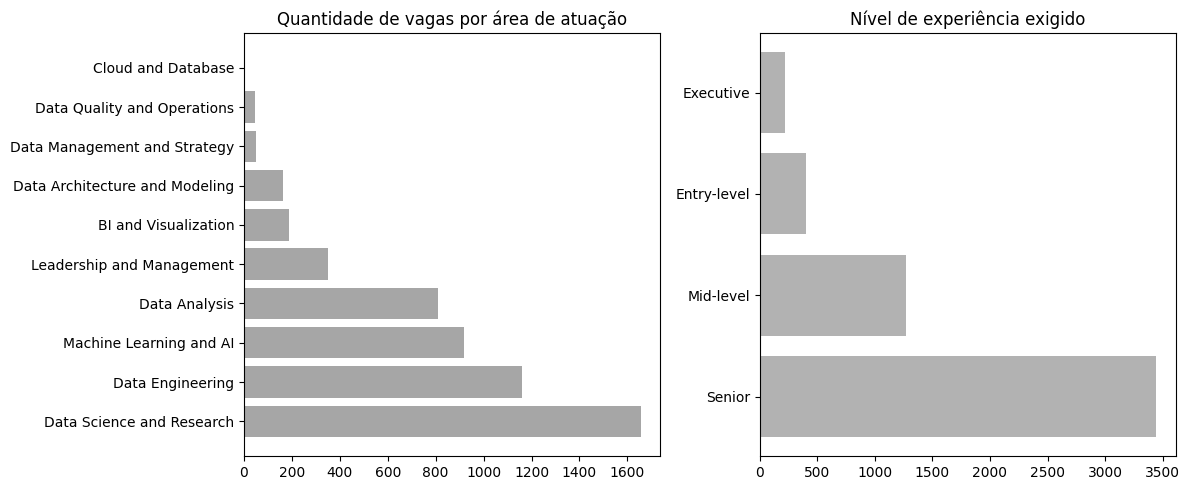

In [104]:
# Definindo os subplots
plt.figure(figsize=(12, 5))

# Subplot 1
plt.subplot(1, 2, 1)  # Uma linha, duas colunas, primeiro subplot
plt.barh(total_categoria['job_category'], total_categoria['quantidade'], color='grey', alpha=0.7)
plt.title('Quantidade de vagas por área de atuação')

# Subplot 2
plt.subplot(1, 2, 2)  # Uma linha, duas colunas, segundo subplot
plt.barh(nivel_experiencia['experience_level'], nivel_experiencia['quantidade'], color='grey', alpha=0.6)
plt.title('Nível de experiência exigido')

plt.tight_layout()  # Ajusta automaticamente a disposição dos subplots para evitar sobreposição
plt.show()